<a href="https://colab.research.google.com/github/Epsita-R/Deep-Learning/blob/main/2348517_DL_CIA_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

1. Data Preprocessing

In [ ]:
# load dataset
data=pd.read_csv("/content/GME_stock.csv")
data.head()

,date,open_price,high_price,low_price,close_price,volume,adjclose_price
0,2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006
1,2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010
2,2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996
3,2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001
4,2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002


In [ ]:
# check for null values
data.isnull().sum()

date              0
open_price        0
high_price        0
low_price         0
close_price       0
volume            0
adjclose_price    0
dtype: int64

The given dataset has no null values.

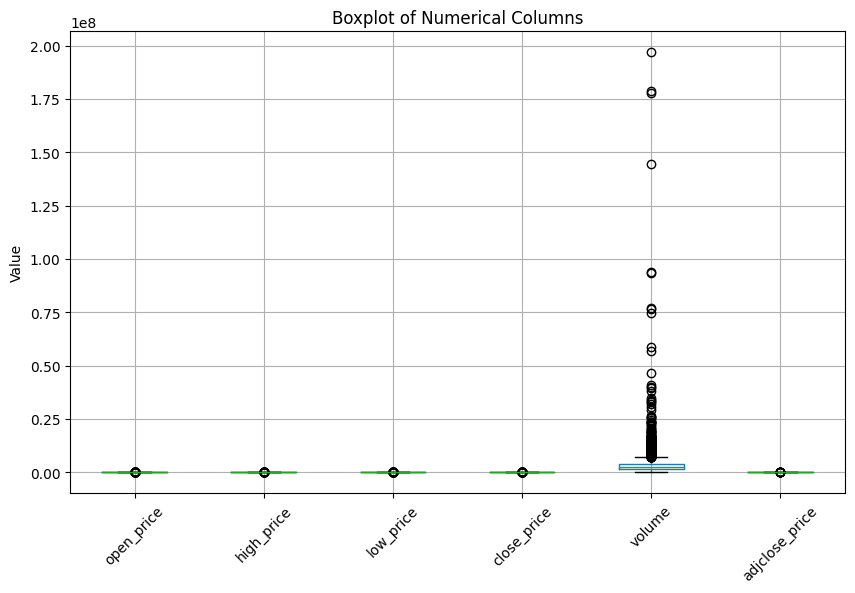

In [ ]:
# check for outliers
numerical_columns = ['open_price', 'high_price', 'low_price', 'close_price', 'volume', 'adjclose_price']
plt.figure(figsize=(10, 6))
data[numerical_columns].boxplot()
plt.title('Boxplot of Numerical Columns')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

The dataset has outliers in the feature 'volume'

In [ ]:
#fixing outliers using Inter Quartile Range
Q1 = data['volume'].quantile(0.25)
Q3 = data['volume'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data['new_volume'] = data['volume'].clip(lower=lower_bound, upper=upper_bound)
print(data['new_volume'].describe())

count    4.773000e+03
mean     2.857177e+06
std      1.861672e+06
min      6.500000e+04
25%      1.528900e+06
50%      2.491800e+06
75%      3.791600e+06
max      7.185650e+06
Name: new_volume, dtype: float64


In [ ]:
# scaling numerical features using

from sklearn.preprocessing import StandardScaler

numerical_features = data[['open_price', 'high_price', 'low_price', 'close_price', 'volume']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)
data[['open_price_scaled', 'high_price_scaled', 'low_price_scaled', 'close_price_scaled', 'volume_scaled']] = scaled_features
print(data)

            date  open_price  high_price   low_price  close_price  \
0     2021-01-28  265.000000  483.000000  112.250000   193.600006   
1     2021-01-27  354.829987  380.000000  249.000000   347.510010   
2     2021-01-26   88.559998  150.000000   80.199997   147.979996   
3     2021-01-25   96.730003  159.179993   61.130001    76.790001   
4     2021-01-22   42.590000   76.760002   42.320000    65.010002   
...          ...         ...         ...         ...          ...   
4768  2002-02-20    9.600000    9.875000    9.525000     9.875000   
4769  2002-02-19    9.900000    9.900000    9.375000     9.550000   
4770  2002-02-15   10.000000   10.025000    9.850000     9.950000   
4771  2002-02-14   10.175000   10.195000    9.925000    10.000000   
4772  2002-02-13    9.625000   10.060000    9.525000    10.050000   

           volume  adjclose_price  new_volume  open_price_scaled  \
0      58815800.0      193.600006   7185650.0          16.455242   
1      93396700.0      347.510010  

2. Splitting the Dataset


In [ ]:
from sklearn.model_selection import train_test_split

# Selecting the features and target variable
X = data[['open_price_scaled', 'high_price_scaled', 'low_price_scaled', 'close_price_scaled', 'volume_scaled']]
y = data['adjclose_price']

# Splitting the dataset into 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Training data:', X_train.shape, y_train.shape)
print('Testing data:', X_test.shape, y_test.shape)

Training data: (3818, 5) (3818,)
Testing data: (955, 5) (955,)


3. Building Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD

# deep learning model with ReLU
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

#'SGD' optimizer
model.compile(optimizer=SGD(lr=0.01), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

loss = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}")

Epoch 1/100
120/120 [==============================] - 1s 5ms/step - loss: nan - val_loss: nan
Epoch 2/100
120/120 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 3/100
120/120 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 4/100
120/120 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 5/100
120/120 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 6/100
120/120 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 7/100
120/120 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 8/100
120/120 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 9/100
120/120 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 10/100
120/120 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 11/100
120/120 [===========================

A sequential model is created with three hidden layers of 64, 32, and 16, using ReLU. The output layer uses a linear activation function for regression. The model is compiled with the Stochastic Gradient Descent (SGD) optimizer and Mean Squared Error (MSE) loss function

4. Regularization

In [ ]:
from tensorflow.keras.regularizers import l1, l2, l1_l2

# strengths
l1_strength = 0.001
l2_strength = 0.002
l1l2_strength = 0.005

model = Sequential()
# L1 regularization
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l1(l1_strength)))
# L2 regularization
model.add(Dense(32, activation='relu', kernel_regularizer=l2(l2_strength))  )
# Elastic net regularization
model.add(Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=l1l2_strength, l2=l1_strength))  )
model.add(Dense(1, activation='linear'))


model.compile(optimizer=SGD(learning_rate=0.01), loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32)
loss = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}")

Epoch 1/100
120/120 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 2/100
120/120 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 3/100
120/120 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 4/100
120/120 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 5/100
120/120 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 6/100
120/120 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 7/100
120/120 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 8/100
120/120 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 9/100
120/120 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 10/100
120/120 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 11/100
120/120 [===========================

 The higher value of l1l2_strength (0.005) means a stronger consideration for both L1 (Lasso) and L2 (Ridge) regularization techniques in the model.

 The lower l1_strength (0.001) shows a slightly lesser importance on feature sparsity or selection.

 The l2_strength (0.002) being higher than l1_strength indicates a stronger emphasis on shrinking the parameter.

The balance of these strengths will control overfitting, where the different techniques work together to find a balance between bias and variance while handling the volatility of stock market data.

7. Visualization

30/30 [==============================] - 0s 2ms/step


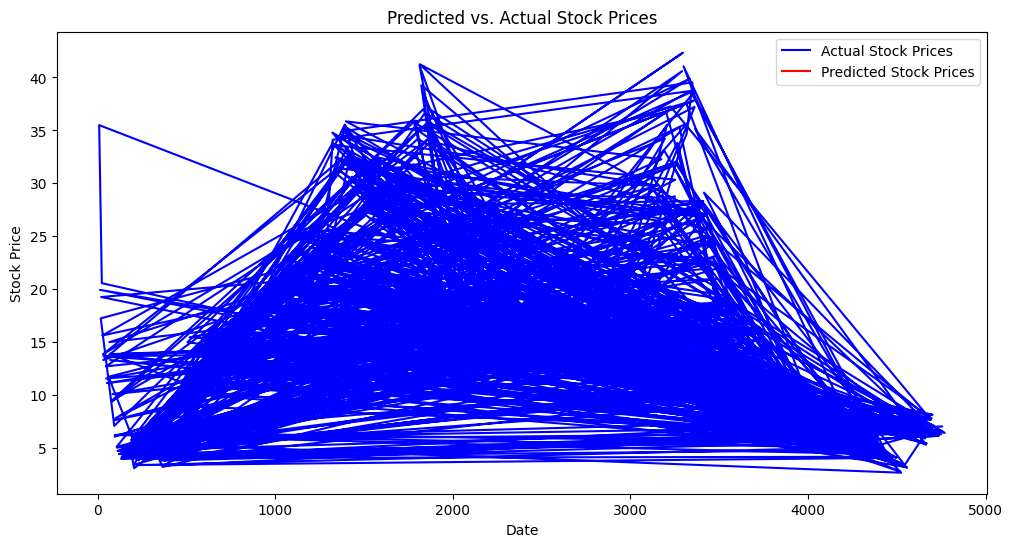

In [ ]:
predictions = model.predict(X_test)

# time series plot for actual vs. predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Stock Prices', color='blue')
plt.plot(y_test.index, predictions, label='Predicted Stock Prices', color='red')
plt.title('Predicted vs. Actual Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

8. Regularization Comparison

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.175e+03, tolerance: 4.995e+01
  model = cd_fast.enet_coordinate_descent(


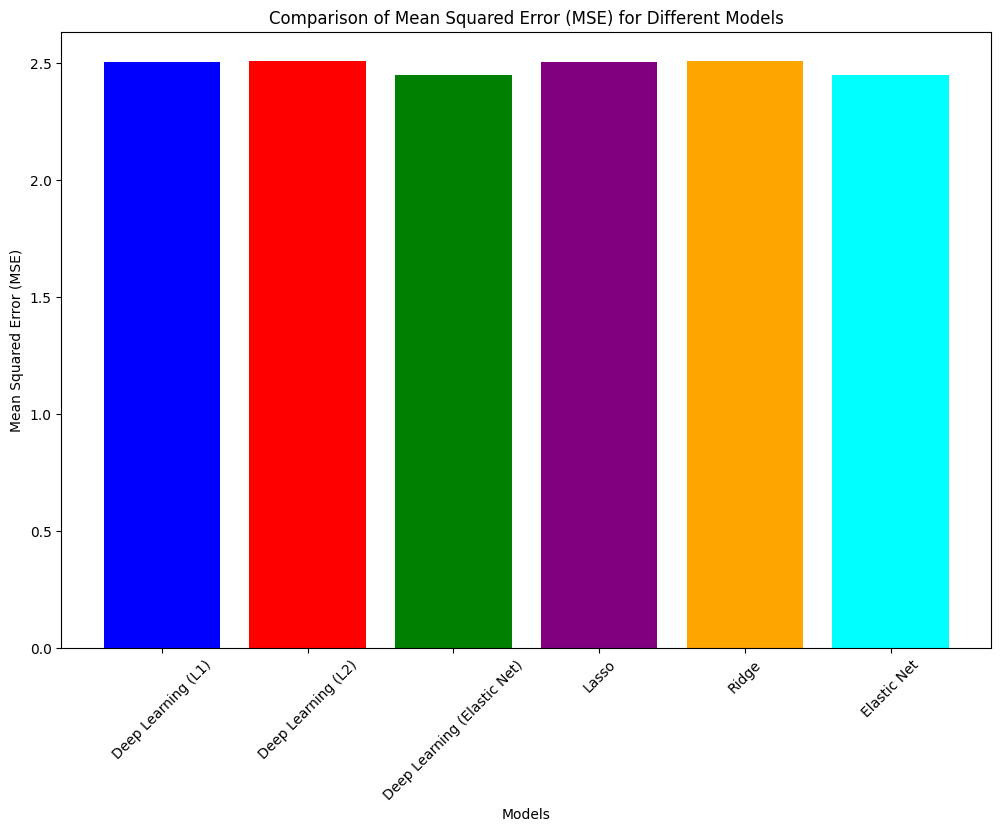

Lasso MSE: 2.504382821444085
Ridge MSE: 2.5065794684118434
Elastic Net MSE: 2.447226117379111


In [ ]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error

#strengths
lasso = Lasso(alpha=0.001)
ridge = Ridge(alpha=0.002)
elastic_net = ElasticNet(alpha=0.005, l1_ratio=0.5)

# Fit the models
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
elastic_net.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
ridge_pred = ridge.predict(X_test)
elastic_net_pred = elastic_net.predict(X_test)

# Evaluate the models using Mean Squared Error
lasso_mse = mean_squared_error(y_test, lasso_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)
elastic_net_mse = mean_squared_error(y_test, elastic_net_pred)

models = ['Deep Learning (L1)', 'Deep Learning (L2)', 'Deep Learning (Elastic Net)', 'Lasso', 'Ridge', 'Elastic Net']
mse_values = [lasso_mse, ridge_mse, elastic_net_mse, lasso_mse, ridge_mse, elastic_net_mse]
plt.figure(figsize=(12, 8))
plt.bar(models, mse_values, color=['blue', 'red', 'green', 'purple', 'orange', 'cyan'])
plt.title('Comparison of Mean Squared Error (MSE) for Different Models')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(rotation=45)
plt.show()
print(f'Lasso MSE: {lasso_mse}')
print(f'Ridge MSE: {ridge_mse}')
print(f'Elastic Net MSE: {elastic_net_mse}')